Improt

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from metrics import dice_loss, dice_coef, iou
from train import create_dir
from PIL import Image

globle size

In [2]:
H = 512
W = 512

load model

In [3]:
with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
    model = tf.keras.models.load_model("model.h5")

image path

In [4]:
path = "test_girl_2.jpg"

image process for prediction

In [5]:
image = cv2.imread(path, cv2.IMREAD_COLOR)
b,g,r = cv2.split(image)
h, w, _ = image.shape
x = cv2.resize(image, (W, H))
x = x/255.0
x = x.astype(np.float32)
x = np.expand_dims(x, axis=0)

predict alpha and process 

In [6]:
y = model.predict(x)[0]
y = cv2.resize(y, (w, h))
y = np.expand_dims(y, axis=-1)
y *= 255

1/1 [==============================] - 2s 2s/step


removing bg 

In [7]:
final_img = np.dstack((b,g,r,y))

finding the cropping position

In [8]:
non_zero_cordinates = np.column_stack(np.where(y > 1))
w_h_list = list(map(lambda x: x[0],non_zero_cordinates))
x_y_list = list(map(lambda x: x[1],non_zero_cordinates))
a = min(w_h_list)
b = max(w_h_list)
c = min(x_y_list)
d = max(x_y_list)

In [9]:
final_img.shape

(1280, 853, 4)

crooping

In [10]:
cropped = final_img[a:b,c:d]

In [11]:
cropped.shape

(1263, 389, 4)

In [12]:
cropped_y = cropped[:,:,3]

In [13]:
cropped[:,:,:3][cropped_y < 1] = [255,255,255]

In [14]:
cropped_base = cropped[:,:,:3]

In [15]:
cv2.imwrite("cropped_base.jpg",cropped_base)
cv2.imwrite("bg.jpg",np.ones([1500,1500,3])*255)

True

In [16]:
bg = Image.open("bg.jpg")
main_image = Image.open("cropped_base.jpg")

In [17]:
bg.paste(main_image,((bg.width - main_image.width)//2,(bg.height - main_image.height)//2))

In [18]:
bg.save("best.jpg")

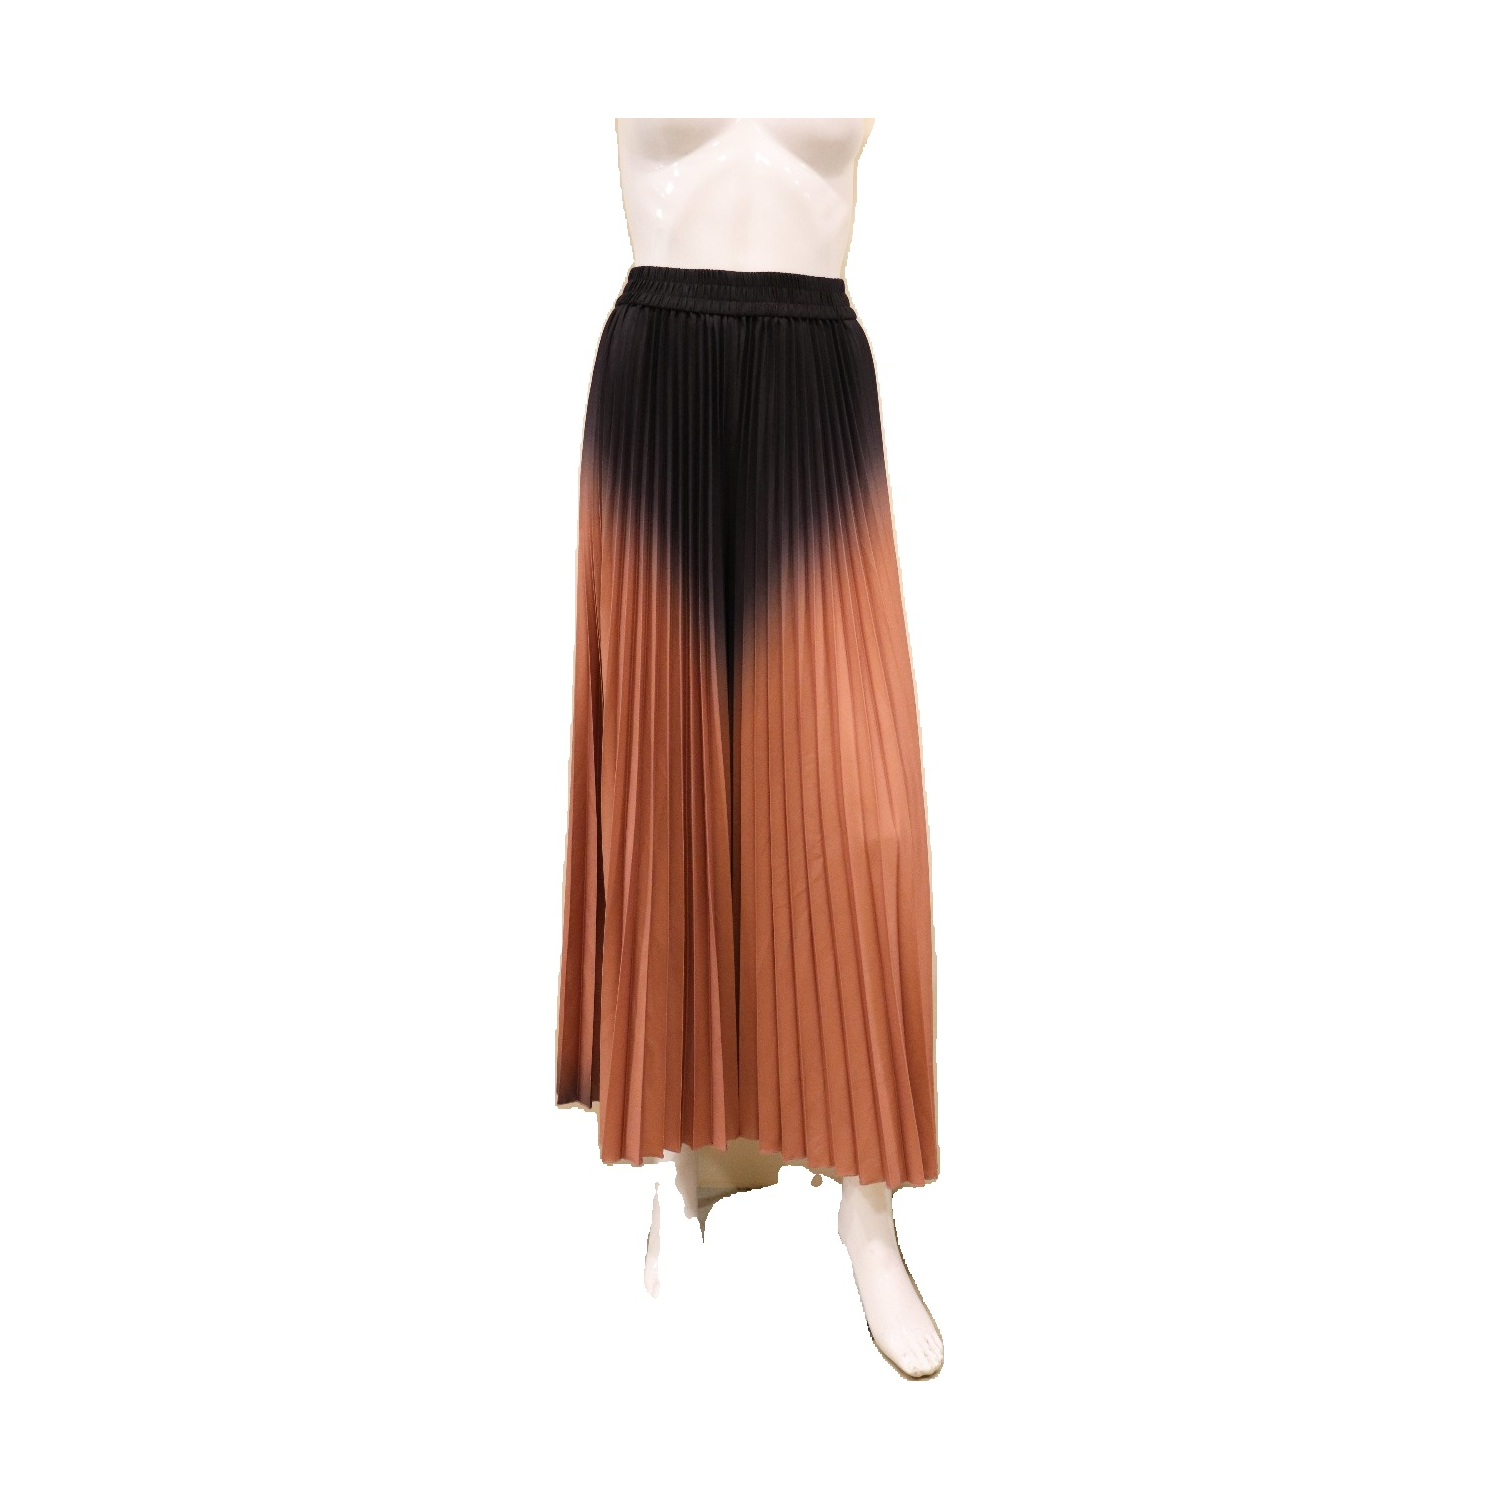

In [19]:
bg

In [13]:
import matplotlib.pyplot as plt

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
import pandas as pd
from glob import glob
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.utils import CustomObjectScope
from metrics import dice_loss, dice_coef, iou
from train import create_dir
from PIL import Image
import tkinter as tk
from tkinter import ttk, filedialog
from tkinter.filedialog import askopenfile

# def display_result(image_path):
#     result_window = window()
#     result_window.title("Result")

#     # Open the cropped image using PIL
#     img = Image.open(image_path).resize((400,400))
#     img = ImageTk.PhotoImage(img)

#     # Display the image in a label
#     label = tk.Label(result_window, image=img)
#     label.image = img
#     label.pack()
from PIL import ImageTk
from tkinter import Label
from PIL.Image import open as open_img
from tkinter import Toplevel


def display_image(impath):
    win = Toplevel(window)
    win.geometry("400x400")
    ope_pop = Image.open(impath).resize((400,400))
    render = ImageTk.PhotoImage(ope_pop)
    im_lable = Label(win, image=render)
    im_lable.image = render
    im_lable.place(x=0,y=0)
   
     
def open_file():
    file = filedialog.askopenfile(mode='r')
    if file:
        filepath = os.path.abspath(file.name)
    image = cv2.imread(filepath, cv2.IMREAD_COLOR)
    b,g,r = cv2.split(image)
    h, w, _ = image.shape
    x = cv2.resize(image, (W, H))
    x = x/255.0
    x = x.astype(np.float32)
    x = np.expand_dims(x, axis=0)
    y = model.predict(x)[0]
    y = cv2.resize(y, (w, h))
    y = np.expand_dims(y, axis=-1)
    y *= 255
    
    final_img = np.dstack((b,g,r,y))
    
    non_zero_cordinates = np.column_stack(np.where(y > 1))
    w_h_list = list(map(lambda x: x[0],non_zero_cordinates))
    x_y_list = list(map(lambda x: x[1],non_zero_cordinates))
    a = min(w_h_list)
    b = max(w_h_list)
    c = min(x_y_list)
    d = max(x_y_list)

    cropped = final_img[a:b,c:d]
    cropped_y = cropped[:,:,3]
    cropped[:,:,:3][cropped_y < 1] = [255,255,255]
    cropped_base = cropped[:,:,:3]
    
    cv2.imwrite("cropped_base.jpg",cropped_base)
    cv2.imwrite("bg.jpg",np.ones([1500,1500,3])*255)
    
    bg = open_img("bg.jpg")
    main_image = open_img("cropped_base.jpg")
    
    bg.paste(main_image,((bg.width - main_image.width)//2,(bg.height - main_image.height)//2))
    
    bg.save("final_tested_ok.jpg")
    display_image("final_tested_ok.jpg")


H = 512
W = 512

with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
    model = tf.keras.models.load_model("model.h5")

window = tk.Tk()
window.geometry("700x300")

# Add a Label widget
label = tk.Label(window, text="Click the Button to browse the Files", font=('Georgia 13'))
label.pack(pady=10)

# Create a Button
ttk.Button(window, text="Browse", command=open_file).pack(pady=20)

window.mainloop()

1/1 [==============================] - 2s 2s/step


In [4]:
! pip install --upgrade tk --user

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [11]:
bg

NameError: name 'bg' is not defined

In [ ]:
# systemctl